In [2]:
!pip install torch
!pip install kmeans-pytorch

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/advanced_ml_final_project')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

embeddings = pd.read_pickle('/content/drive/MyDrive/advanced_ml_final_project/other_data/clean_2020articles_w_title_embeddings.pkl')

In [5]:
embeddings.rename(columns={"bert_sentence_embedding_title_only": "bert_embeddings"})
embeddings["bert_embeddings"] = embeddings["bert_sentence_embedding_title_only"].apply(lambda x: x.cpu())
embeddings["np_embeddings"] = embeddings["bert_embeddings"].apply(lambda x: x.numpy())

In [6]:
np_embeddings = np.vstack(embeddings["np_embeddings"])

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score # TODO read about these scoring mechanisms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def eval_cluster(embedding):
    y_pred = kmeans.fit_predict(embedding)

    # Evaluate the performance using ARI, NMI, and FMI
    ari = adjusted_rand_score(embeddings["target"], y_pred)
    nmi = normalized_mutual_info_score(embeddings["target"], y_pred)
    fmi = fowlkes_mallows_score(embeddings["target"], y_pred)

    # Print Metrics scores
    print("Adjusted Rand Index (ARI): {:.3f}".format(ari))
    print("Normalized Mutual Information (NMI): {:.3f}".format(nmi))
    print("Fowlkes-Mallows Index (FMI): {:.3f}".format(fmi))

def dimension_reduction(embedding, method):

    pca = PCA(n_components=2, random_state=42)

    pca_vecs = pca.fit_transform(embedding)

    # save our two dimensions into x0 and x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    embeddings[f'x0_{method}'] = x0
    embeddings[f'x1_{method}'] = x1

def plot_pca(x0_name, x1_name, cluster_name, method):

    plt.figure(figsize=(12, 7))

    plt.title(f"Clustering with {method}", fontdict={"fontsize": 18})
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    sns.scatterplot(data=embeddings, x=x0_name, y=x1_name, hue=cluster_name, palette="viridis")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


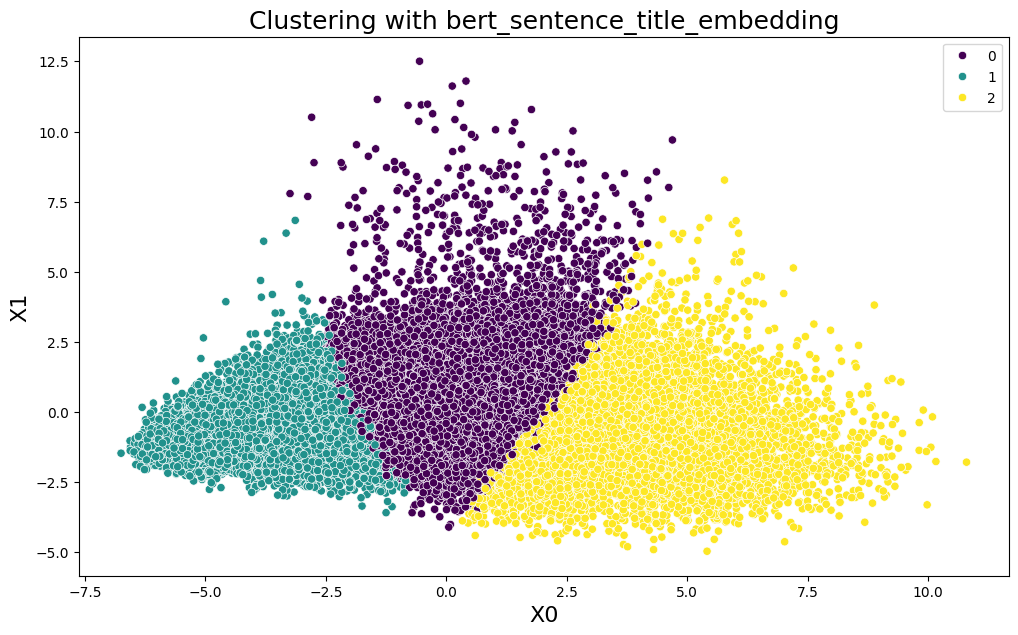

In [10]:
method = 'bert_sentence_title_embedding'
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model
kmeans.fit(np_embeddings)

# store cluster labels in a variable
clusters = kmeans.labels_

# Assign clusters to our dataframe
clusters_result_name = f'cluster_bert_embeddings'
embeddings['bert_clusters'] = clusters

#eval_cluster(np_embeddings)

dimension_reduction(np_embeddings, method)

plot_pca(f'x0_{method}', f'x1_{method}', cluster_name=clusters, method=method)

In [11]:
k_values = [10,50,100]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np_embeddings)
    clusters = kmeans.labels_
    embeddings[f'cluster_{k}'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
embeddings["count"] = 1
count_clusters_k10 = embeddings.groupby("cluster_10").count().sort_values(by="count", ascending=False)["count"]
count_clusters_k50 = embeddings.groupby("cluster_50").count().sort_values(by="count", ascending=False)["count"]
count_clusters_k100 = embeddings.groupby("cluster_100").count().sort_values(by="count", ascending=False)["count"]

In [16]:
count_clusters_k10

cluster_10
8    7205
3    4959
1    4748
9    3867
4    3742
6    3378
5    3142
7    3038
0    2390
2     575
Name: count, dtype: int64

In [17]:
count_clusters_k50

cluster_50
3     2243
42    1809
2     1767
29    1406
19    1202
15    1129
10    1058
7     1015
45     948
21     875
26     873
43     844
14     840
27     822
32     818
40     808
23     800
1      795
28     778
46     773
11     760
0      747
44     737
37     720
22     705
33     657
13     641
41     633
12     629
9      619
36     615
6      553
17     551
8      547
48     543
35     543
4      514
39     470
16     452
49     450
18     448
5      430
38     420
24     410
31     393
30     332
25     280
20     262
47     252
34     128
Name: count, dtype: int64

In [18]:
count_clusters_k100

cluster_100
86    1361
25    1060
61     988
46     938
72     918
      ... 
83     159
97     154
74     122
0      111
20      93
Name: count, Length: 100, dtype: int64

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

doc_per_topic_k10 = embeddings.groupby("cluster_10",as_index=False).agg({"title_text": " ".join})
doc_per_topic_k50 = embeddings.groupby("cluster_50",as_index=False).agg({"title_text": " ".join})
doc_per_topic_k100 = embeddings.groupby("cluster_100",as_index=False).agg({"title_text": " ".join})



1225402